In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\2211568\AppData\Local\Temp\1\pip-install-yuds6fim\numpy_73410183945542a9bfdf98bb32ee5820\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\2211568\\New folder (2)\\lib', 'C:\\', 'C:\\Users\\2211568\\New folder (2)\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\2211568\\New folder (2)\\lib', 'C:\\', 'C:\\Users\\2211568\\New folder (2)\\libs']
    NOT AVAILABLE
  
 


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.13
    Uninstalling urllib3-1.26.13:
      Successfully uninstalled urllib3-1.26.13
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Running setup.py install

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.



     -------------------------------------- 62.8/62.8 kB 559.6 kB/s eta 0:00:00


     -------------------------------------- 140.6/140.6 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
  Attempting uninstall: requests
    Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


In [2]:
from autogluon.tabular import TabularDataset,TabularPredictor

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
bike_df=pd.read_csv('bike_sharing_daily.csv')

In [11]:
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [12]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual
21,1,0,1,0,6,0,1,0.05913,0.4,0.17197,93


In [13]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [15]:
#train/evaluate multiple regression using autogluon

In [16]:
bike_df.drop(['registered','cnt','instant','dteday'],inplace=True,axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(bike_df,random_state=0,test_size=0.2)

In [18]:
#Autogluon is modularised into text(NLP),image(DL) and tabular dataset(ML)
#time_limit is necessary to define otherwise it will keep running
from autogluon.tabular import TabularDataset, TabularPredictor
predictor=TabularPredictor(label='casual',problem_type='regression',eval_metric='r2').fit(train_data=X_train,time_limit=200,presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20221201_041653\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels\ag-20221201_041653\"
AutoGluon Version:  0.6.0
Python Version:     3.9.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    584
Train Data Columns: 10
Label Column: casual
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5710.44 MB
	Train Data (Original)  Memory Usage: 0.05 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features t

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.843935       0.092024  20.048813                0.001039           0.099054            2       True          4
1      LightGBMXT_BAG_L1   0.842214       0.040614  17.747371                0.040614          17.747371            1       True          3
2  KNeighborsUnif_BAG_L1   0.656510       0.050371   2.202389                0.050371           2.202389            1       True          1
3  KNeighborsDist_BAG_L1   0.609321       0.009998   0.006005                0.009998           0.006005            1       True          2
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 5 folds)
Multi-layer stack-ensembling used: False 
Feature Metadata (Processe

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6565100715854191,
  'KNeighborsDist_BAG_L1': 0.6093214275254359,
  'LightGBMXT_BAG_L1': 0.8422137032313775,
  'WeightedEnsemble_L2': 0.8439352827876229},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels\\ag-20221201_041653\\models\\KNeighborsUnif_BAG_L1\\',
  'KNeighborsDist_BAG_L1': 'AutogluonModels\\ag-20221201_041653\\models\\KNeighborsDist_BAG_L1\\',
  'LightGBMXT_BAG_L1': 'AutogluonModels\\ag-20221201_041653\\models\\LightGBMXT_BAG_L1\\',
  'WeightedEnsemble_L2': 'AutogluonModels\\ag-20221201_041653\\models\\WeightedEnsemble_L2\\'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 2.2023885250091553,
  'KNeighborsDist_BAG_L1': 0.0060045719146728516,
  'LightGBMXT_B

2022-12-01 09:57:09,914	ERROR import_thread.py:76 -- ImportThread: <_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "Stream removed"
	debug_error_string = "{"created":"@1669868829.914000000","description":"Error received from peer ipv4:127.0.0.1:64234","file":"src/core/lib/surface/call.cc","file_line":1064,"grpc_message":"Stream removed","grpc_status":2}"
>
Exception in thread ray_listen_error_messages:
Traceback (most recent call last):
  File "C:\Users\2211568\New folder (2)\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\2211568\New folder (2)\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\2211568\New folder (2)\lib\site-packages\ray\_private\worker.py", line 1814, in listen_error_messages
    _, error_data = worker.gcs_error_subscriber.poll()
  File "C:\Users\2211568\New folder (2)\lib\site-packages\ray\_private\gcs_pubsub.py", line 317, in poll
    sel

In [21]:
predictor.leaderboard()

                   model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.843935       0.092024  20.048813                0.001039           0.099054            2       True          4
1      LightGBMXT_BAG_L1   0.842214       0.040614  17.747371                0.040614          17.747371            1       True          3
2  KNeighborsUnif_BAG_L1   0.656510       0.050371   2.202389                0.050371           2.202389            1       True          1
3  KNeighborsDist_BAG_L1   0.609321       0.009998   0.006005                0.009998           0.006005            1       True          2


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.843935,0.092024,20.048813,0.001039,0.099054,2,True,4
1,LightGBMXT_BAG_L1,0.842214,0.040614,17.747371,0.040614,17.747371,1,True,3
2,KNeighborsUnif_BAG_L1,0.656510,0.050371,2.202389,0.050371,2.202389,1,True,1
3,KNeighborsDist_BAG_L1,0.609321,0.009998,0.006005,0.009998,0.006005,1,True,2


                   model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L2   0.843935       0.092024  20.048813                0.001039           0.099054            2       True          4
1      LightGBMXT_BAG_L1   0.842214       0.040614  17.747371                0.040614          17.747371            1       True          3
2  KNeighborsUnif_BAG_L1   0.656510       0.050371   2.202389                0.050371           2.202389            1       True          1
3  KNeighborsDist_BAG_L1   0.609321       0.009998   0.006005                0.009998           0.006005            1       True          2


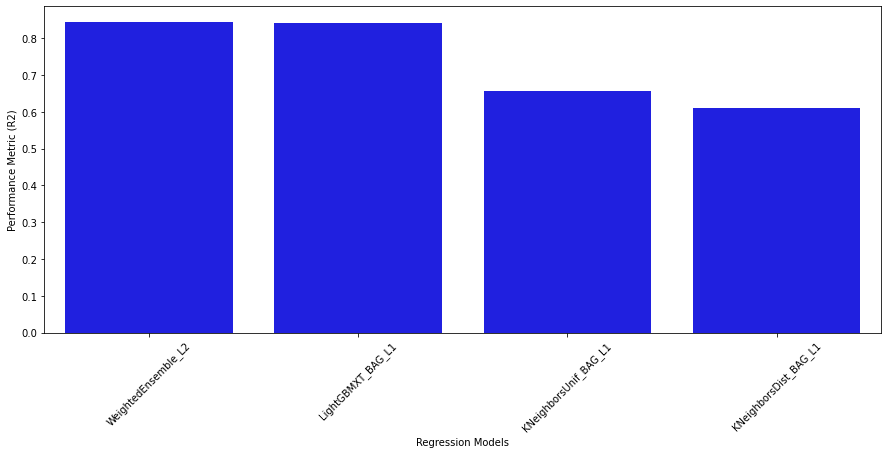

In [20]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [22]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.8749292414584182
Evaluations on test data:
{
    "r2": 0.8749292414584182,
    "root_mean_squared_error": -257.07522538363287,
    "mean_squared_error": -66087.67150604563,
    "mean_absolute_error": -171.64408921222298,
    "pearsonr": 0.9362149505642896,
    "median_absolute_error": -114.8287353515625
}


{'r2': 0.8749292414584182,
 'root_mean_squared_error': -257.07522538363287,
 'mean_squared_error': -66087.67150604563,
 'mean_absolute_error': -171.64408921222298,
 'pearsonr': 0.9362149505642896,
 'median_absolute_error': -114.8287353515625}

In [ ]:
#looking 5 best models

In [23]:
y_pred=predictor.predict(X_test)
print("predictions:",y_pred)

predictions: 196    1923.141479
187     770.068237
14      180.514908
31      150.500122
390     231.355820
          ...     
566     755.383301
688     451.185913
266    1582.632690
504    2819.739502
239    1640.668457
Name: casual, Length: 147, dtype: float32


In [24]:
y_test=X_test['casual']
